In [1]:
from pathlib import Path
import yaml

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_all_generations_path = Path("outputs").absolute() / "11_ps_check" / "iea22_raft_opt_driver2_out" / "nsga2_debug.yaml"

In [3]:
with open(data_all_generations_path) as f_data:
    data_all_generations = yaml.safe_load(f_data)
for k, v in data_all_generations.items():
    data_all_generations[k] = {
        ki: ([np.array(vii) for vii in vi] if type(vi) == list else vi) for ki, vi in data_all_generations[k].items()
    }

generation: 16
	count in front: 9, len unique_entries_obj0: 6, len unique_entries_obj1: 6
	count in front: 22, len unique_entries_obj0: 11, len unique_entries_obj1: 11
	count in front: 51, len unique_entries_obj0: 23, len unique_entries_obj1: 23
	count in front: 35, len unique_entries_obj0: 24, len unique_entries_obj1: 24
	count in front: 47, len unique_entries_obj0: 32, len unique_entries_obj1: 32
	count in front: 36, len unique_entries_obj0: 28, len unique_entries_obj1: 28
	count in generation: 200
generation: 17
	count in front: 4, len unique_entries_obj0: 4, len unique_entries_obj1: 4
	count in front: 23, len unique_entries_obj0: 11, len unique_entries_obj1: 11
	count in front: 50, len unique_entries_obj0: 22, len unique_entries_obj1: 22
	count in front: 31, len unique_entries_obj0: 19, len unique_entries_obj1: 19
	count in front: 46, len unique_entries_obj0: 31, len unique_entries_obj1: 31
	count in front: 43, len unique_entries_obj0: 31, len unique_entries_obj1: 31
	count in fron

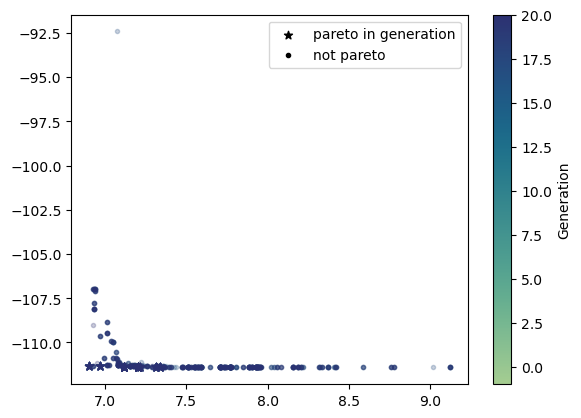

In [4]:
N_obj = None
N_constr = None
N_DV = None

qois_anticipated = ["objs_fronts", "constrs_fronts", "design_vars_fronts"]

# create a colormap for generations
cmap = plt.get_cmap("crest")
norm = plt.Normalize(min(data_all_generations.keys()), max(data_all_generations.keys()))
fig, ax = plt.subplots()

plt.scatter([], [], c="k", marker="*", label="pareto in generation")
plt.scatter([], [], c="k", marker=".", label="not pareto")

# iterate over the generations
# for idx_gen, data_gen in data_all_generations.items():
# for idx_gen, data_gen in list(data_all_generations.items())[-1:]:
for idx_gen, data_gen in list(data_all_generations.items())[-5:]:
# for idx_gen, data_gen in list(data_all_generations.items())[:16]:

    print(f"generation: {idx_gen}")

    count_gen = 0

    N_fronts = len(data_gen[qois_anticipated[0]])
    for qoi in qois_anticipated: assert len(data_gen[qoi]) == N_fronts
    N_qoi = dict.fromkeys(qoi, None)

    assert idx_gen == data_gen["generation"]  # make sure they match

    color = cmap(norm(idx_gen))

    for idx_front, obj_data_front in enumerate(data_gen["objs_fronts"]):
        count_gen += len(obj_data_front)
        s = ax.scatter(
            obj_data_front[:, 0], obj_data_front[:, 1],
            marker="*" if idx_front == 0 else ".",
            alpha=1.0 if idx_front == 0 else 0.25,
            color=color,
        )

        # count the number of entries in obj_data_front[:, 0] that are unique up to the standard of np.isclose()
        unique_entries_obj0 = np.unique(obj_data_front[:, 0])
        unique_entries_obj1 = np.unique(obj_data_front[:, 1])
        print(
            "\t"
            f"count in front: {len(obj_data_front)}, "
            f"len unique_entries_obj0: {len(unique_entries_obj0)}, "
            f"len unique_entries_obj1: {len(unique_entries_obj1)}"
        )

    print(f"\tcount in generation: {count_gen}")
ax.legend()

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, label="Generation", ax=ax)

In [5]:
big_DV_stack = np.vstack(list(data_all_generations.values())[-1]["design_vars_fronts"])
for i in range(big_DV_stack.shape[1]):
    unique_vals = []
    for val in big_DV_stack[:, i]:
        if not any(np.isclose(val, u) for u in unique_vals):
            unique_vals.append(val)
    print(f"column {i}: {len(unique_vals)} effectively unique values")
unique_vals = []
for row in big_DV_stack:
    if not any(np.all(np.isclose(row, u)) for u in unique_vals):
        unique_vals.append(row)
print(f"{len(unique_vals)} effectively unique rows")
print(f"{len(big_DV_stack)} total entries")

column 0: 93 effectively unique values
column 1: 90 effectively unique values
column 2: 90 effectively unique values
column 3: 89 effectively unique values
115 effectively unique rows
200 total entries
